## Business Understanding 

For this project, I picked the data from kaggle about the best selling books on Amazon.
From this project I have tried to answer questions like:

1. As a first time reader which book is mostly picked by readers. 
2. Which genres are popular amongs readers
3. What is the ratio of Fiction to Non-Fiction boks in Best Selling category
4. The bok with maximum reviews on Amazon, etc. 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data Understanding

In [7]:
books = pd.read_csv('bestsellers with categories.csv')
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Data Preperation

In [8]:
#sorting the dataframe by no. of reviews
books = books.sort_values(by='Reviews').reset_index()
#resetting the index
books.drop('index',axis=1,inplace=True)
books.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction
1,Soul Healing Miracles: Ancient and New Sacred ...,Zhi Gang Sha,4.6,220,17,2013,Non Fiction
2,George Washington's Sacred Fire,Peter A. Lillback,4.5,408,20,2010,Non Fiction
3,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15,2009,Non Fiction
4,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11,2010,Non Fiction


## What is the ratio of best selling fiction and non-fiction books from 2009 to 2019?

In [31]:
x1 = books[books['Genre']=='Fiction'].shape[0]  #x1 is the dataframe of Fictional Bestselling books
x2 = books[books['Genre']=='Non Fiction'].shape[0] #x2 is the datframe of Non Fictional Bestselling books


def ratio(x):
    """
    Function ratio returns the ratio of each genre type in the whole dataset
    Parameters:
    x(int): no. of rows in each genre type"""
    
    return (x/books.shape[0] * 100)
Fictional_Books = math.floor(ratio(x1)) #ratio of Fictional_books in books dataset
NonFictional_Books = math.ceil(ratio(x2)) #ratio of NonFictional_books in books dataset

print('From total Best Selling Books in the period 2009-19 {}% are Fictional'.format(Fictional_Books))
print('From total Best Selling Books in the period 2009-19 {}% are Non Fictional'.format(NonFictional_Books))

From total Best Selling Books in the period 2009-19 43% are Fictional
From total Best Selling Books in the period 2009-19 57% are Non Fictional


Text(0.5, 1.0, 'Count of Fiction and Non Fiction Best Selling Books according to Reviews(2009-19)')

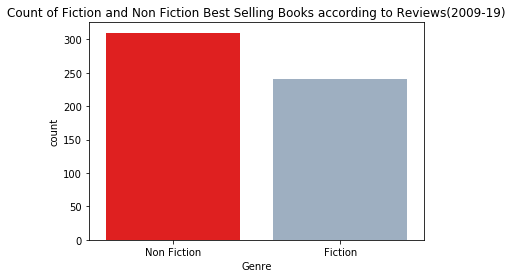

In [5]:
#Comparing the count of Non Fiction and Fiction books
g = sns.countplot(x='Genre',data=books,palette=['#FF0000',"#98AFC7"])
plt.title("Count of Fiction and Non Fiction Best Selling Books according to Reviews(2009-19)")

### From the above plot it is clear that we have more non fiction best selling books than fictional books.

####  But can we say the same for each year ?

Text(0.5, 1.0, 'Count of Fiction and Non Fiction Best Selling Books each year')

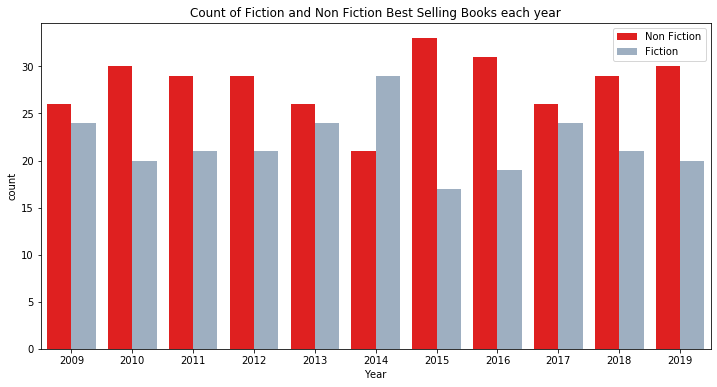

In [6]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="Year",hue="Genre",data=books,palette=['#FF0000',"#98AFC7"])
plt.legend(loc='upper right')
plt.title("Count of Fiction and Non Fiction Best Selling Books each year")

From the above plot it is clear that every year we have more non fiction books in the best seller category

## Which are the top 15 best selling authors ?

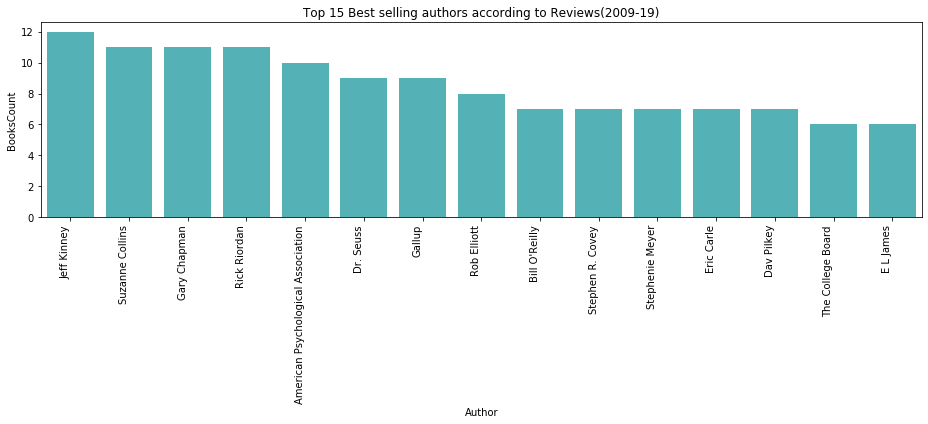

In [7]:
plt.figure(figsize=(13, 6))
authors = books["Author"].value_counts().head(15) #counting number of times author was a bestseller
df_authors = pd.DataFrame(authors)
df_authors.reset_index(inplace=True)
df_authors = df_authors.rename(columns = {"index":'Author','Author':'BooksCount'}) 
plot = sns.barplot(x=df_authors['Author'], y=df_authors['BooksCount'],color='#43BFC7')
plt.title("Top 15 Best selling authors according to Reviews(2009-19)")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

##  Which are the top 10 Books with maximum Reviews ?

Text(0.5, 1.0, 'Top 10 Books with maximum reviews')

<Figure size 936x432 with 0 Axes>

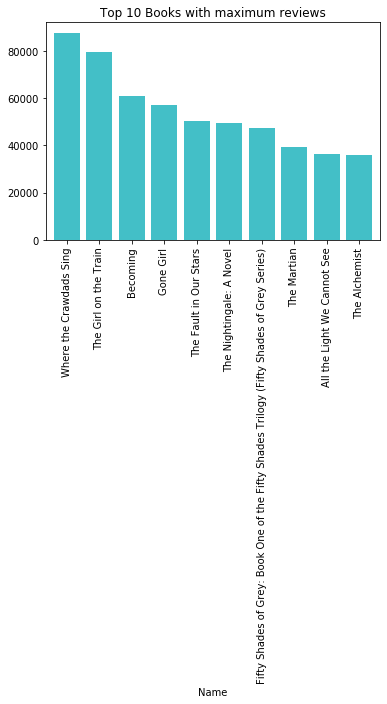

In [29]:
#removing duplicates of best selling books as to count them only once while counting top 10 book with max. reviews
plt.figure(figsize=(13, 6))
df_RemovedDuplicates = books.drop_duplicates(subset='Name') 
Max_ReviewedBooks = df_RemovedDuplicates[["Name","Reviews","Genre"]].nlargest(10,"Reviews")
Max_ReviewedBooks[['Name','Reviews']].plot.bar(x="Name",y="Reviews",color='#43BFC7',legend=None, width = 0.8)
plt.title("Top 10 Books with maximum reviews")

## Top 10 Best selling Fiction Books

Text(0.5, 1.0, 'Top 10 Best Selling Fiction Books ')

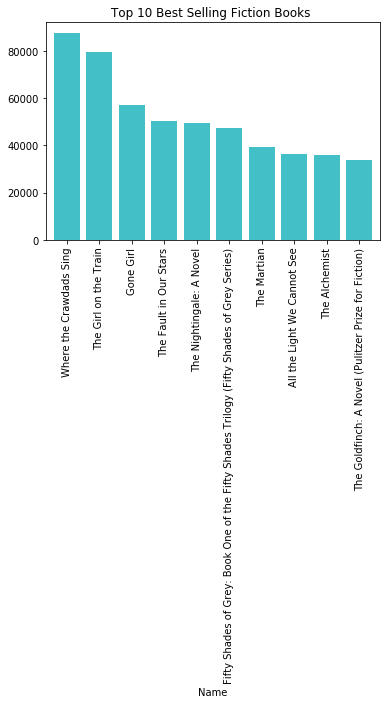

In [28]:
Max_Reviewed_Fictional_Books = df_RemovedDuplicates[df_RemovedDuplicates["Genre"] == "Fiction"].nlargest(10,"Reviews")
Max_Reviewed_Fictional_Books[['Name','Reviews']].plot.bar(x="Name",y="Reviews",color='#43BFC7',legend=None,width=0.8)
plt.title("Top 10 Best Selling Fiction Books ")

## Top 10 Best selling Non Fiction Books

Text(0.5, 1.0, 'Top 10 Best Selling Non Fiction Books')

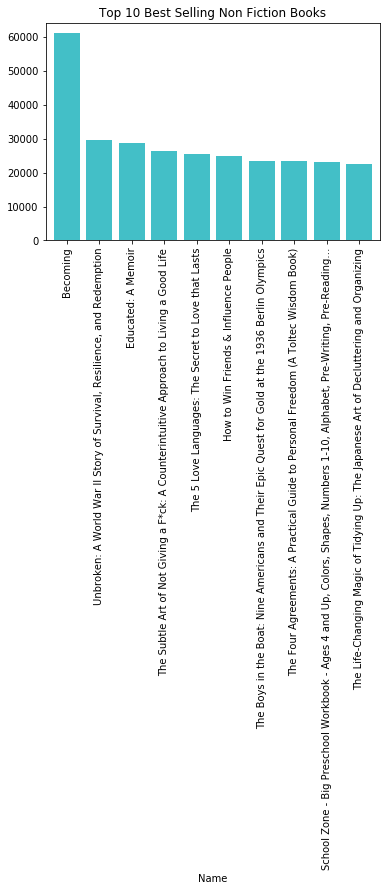

In [27]:
Max_Reviewed_NonFictional_Books = df_RemovedDuplicates[df_RemovedDuplicates["Genre"] == "Non Fiction"].nlargest(10,"Reviews")
Max_Reviewed_NonFictional_Books[['Name','Reviews']].plot.bar(x="Name",y="Reviews",color='#43BFC7',legend=None,width = 0.8)
plt.title("Top 10 Best Selling Non Fiction Books")

## Top 10 expensive best selling books

Text(0.5, 1.0, 'Top 10 Best Selling Books with Highest Price')

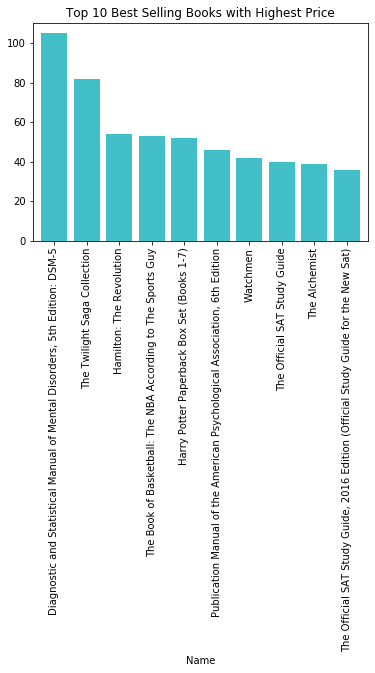

In [14]:
Top10_expensiveBooks = df_RemovedDuplicates.nlargest(10,"Price")
Top10_expensiveBooks[['Name','Price']].plot.bar(x="Name",y="Price",color='#43BFC7',legend=None,width=0.8)
plt.title("Top 10 Best Selling Books with Highest Price")

## Let's Analyze the dataset for year 2019

In [16]:
df_19 = books[books['Year']==2019]
df_19.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
77,The Mueller Report,The Washington Post,4.6,2744,12,2019,Non Fiction
183,Howard Stern Comes Again,Howard Stern,4.3,5272,16,2019,Non Fiction
185,"National Geographic Kids Why?: Over 1,111 Answ...",Crispin Boyer,4.8,5347,16,2019,Non Fiction
190,Guts,Raina Telgemeier,4.8,5476,7,2019,Non Fiction
205,Unfreedom of the Press,Mark R. Levin,4.9,5956,11,2019,Non Fiction


### Top 10 Fictional Books

Text(0.5, 1.0, 'Top 10 Best Selling Fiction Books 2019')

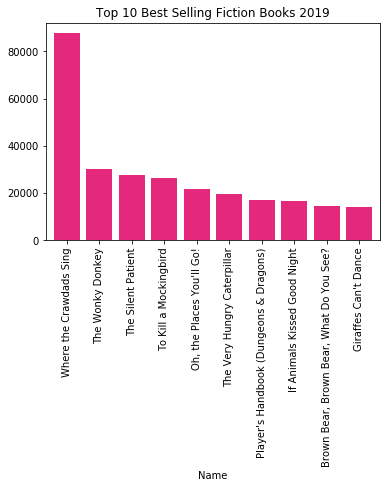

In [17]:
Max_Reviewed_Fictional_Books_19 = df_19[df_19["Genre"] == "Fiction"].nlargest(10,"Reviews")
Max_Reviewed_Fictional_Books_19[['Name','Reviews']].plot.bar(x="Name",y="Reviews",color='#E4287C',legend=None,width=0.8)
plt.title("Top 10 Best Selling Fiction Books 2019")

### Top 10 Non Fictional Books

Text(0.5, 1.0, 'Top 10 Best Selling Non Fiction Books 2019')

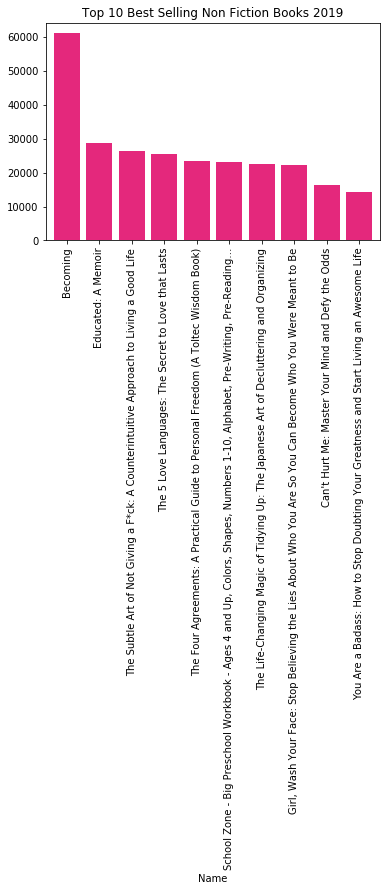

In [22]:
Max_Reviewed_NonFictional_Books_19 = df_19[df_19["Genre"] == "Non Fiction"].nlargest(10,"Reviews")
Max_Reviewed_NonFictional_Books_19[['Name','Reviews']].plot.bar(x="Name",y="Reviews",color='#E4287C',legend=None,width=0.8)
plt.title("Top 10 Best Selling Non Fiction Books 2019")

### Top 10 Best Selling Authors

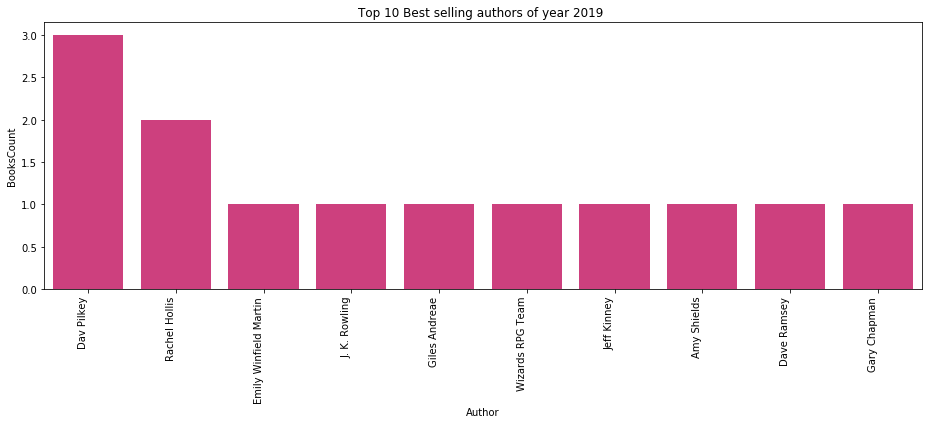

In [23]:
plt.figure(figsize=(13, 6))
authors = df_19["Author"].value_counts().head(10)
df_authors = pd.DataFrame(authors)
df_authors.reset_index(inplace=True)
df_authors = df_authors.rename(columns = {"index":'Author','Author':'BooksCount'}) 
plot = sns.barplot(x=df_authors['Author'], y=df_authors['BooksCount'],color='#E4287C')
plt.title("Top 10 Best selling authors of year 2019 ")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [24]:
df_19 = df_19[df_19['Author']=='Dav Pilkey'].reset_index()
df_19.drop(['index','Price'],axis=1)

,Name,Author,User Rating,Reviews,Year,Genre
0,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,2019,Fiction
1,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,2019,Fiction
2,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,2019,Fiction


## Conclusion

1. The Best Selling Categories of Books have more Non Fictional genere in it than Fictional Books
2. Jeff Kenny remains on top of the list of Best Selling Authors 
3. Becoming was the best selling Non Fictional Book
4. Where the crawdads sing was on top of the Best selling Fictional Books 